# **Coding Assignment #04**

# Hope to Skills

# Free Artificial Intelligence Advance Course

# Instructor: Irfan Malik, Dr. Sheraz
# Student Name:

# **Question 5: Perform Data Cleaning and Exploration using Pandas: (20 Marks)**

● Load the famous Titanic dataset

● Check the first few rows and data types.

● Handle any missing values in the dataset, if present.

● Check for and handle any outliers in the data. (if there)

● Use matplotlib and seaborn to visualize the data distributions

● Create a new column indicating whether a passenger is a child, adult, or elderly based on their
age.

● Calculate the average fare paid by passengers in each class.


# **Question 1: Perform the following tasks: (20 Marks)**

● Create a pairplot to visualize relationships between multiple numerical variables.

● Generate a heatmap to display the correlation matrix of these variables.

● Identify and print pairs of variables with the highest and lowest correlation coefficients

# Dataset: using Titanic Dataset

In [ ]:
# Import the Important libraries
import pandas as pd
import numpy as np
import seaborn as sns     # Visualization
import matplotlib.pyplot as plt   # Visualization
%matplotlib inline
import sklearn
import warnings      # ignore warning
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
# Loading the dataset
full_data = pd.read_csv('/content/titanic_dataset (1).csv')

In [ ]:
full_data.shape

(891, 12)

In [ ]:
# check some top rows
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check the data types
full_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
duplicate_rows_full_data = full_data[full_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_full_data.shape)

number of duplicate rows:  (0, 12)


In [ ]:
# Check for missing values in each column
missing_values = full_data.isnull().sum()
# Handle missing values for each column
for column, missing_count in missing_values.items():
    if missing_count > 0:
        if full_data[column].dtype == "object":
            # For categorical columns, fill missing values with the most frequent value
            full_data[column].fillna(full_data[column].mode()[0], inplace=True)
        else:
            # For numerical columns, fill missing values with the mean
            full_data[column].fillna(full_data[column].mean(), inplace=True)


In [ ]:
# Missing Values in dataset
print(full_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
# Detecting Outliers
Q1 = full_data.quantile(0.25)
Q3 = full_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    454.000
Survived         1.000
Pclass           1.000
Age              8.000
SibSp            0.000
Parch            0.000
Fare             7.275
dtype: float64


<Axes: >

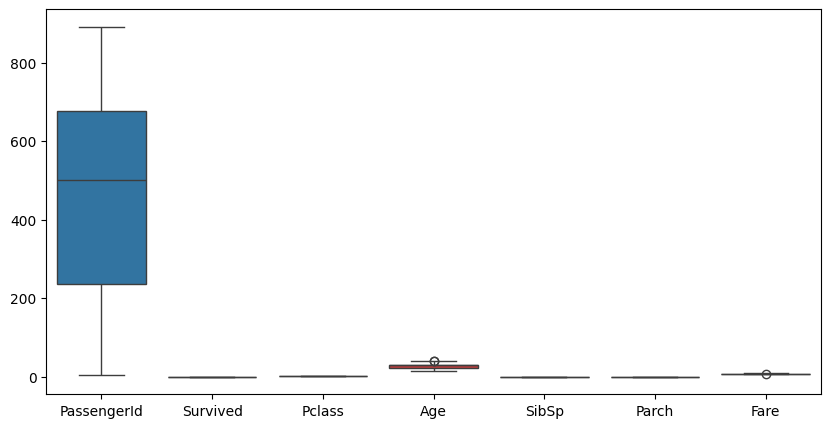

In [ ]:
import pandas as pd
import seaborn as sns

# 1. Identify numerical columns:

numerical_columns = full_data.select_dtypes(include=['int64', 'float64']).columns

# 2. Loop through numerical columns and check for outliers:

for col in numerical_columns:
    # 2.1 Calculate Interquartile Range (IQR):

    Q1 = full_data[col].quantile(0.25)
    Q3 = full_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2.2 Define outlier boundaries:

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2.3 Identify outlier indices:

    outlier_indices = full_data[((full_data[col] < lower_bound) | (full_data[col] > upper_bound))].index

    # 2.4 Handle outliers (e.g., remove, impute, etc.):

    # Option 1: Remove outliers:

    full_data = full_data.drop(outlier_indices)

    # Option 2: Impute outliers with median:

    full_data[col] = full_data[col].where(~full_data[col].isin([lower_bound, upper_bound]), full_data[col].median())

# 3. Generate boxplots after handling outliers:

sns.boxplot(data=full_data[numerical_columns])

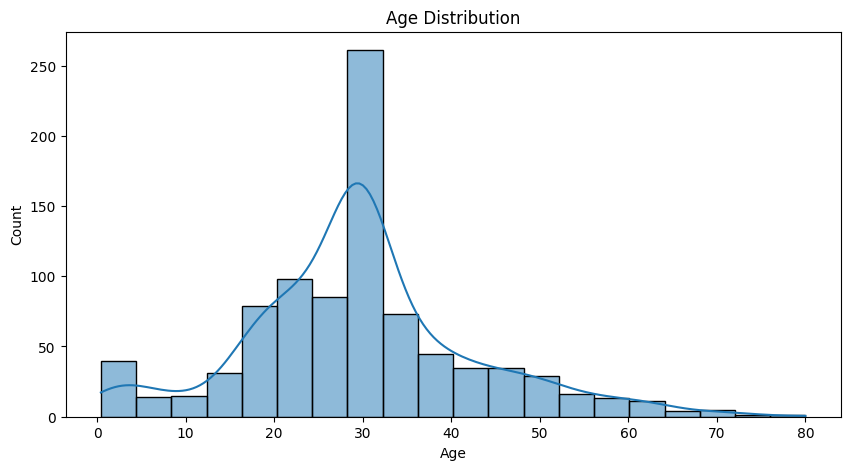

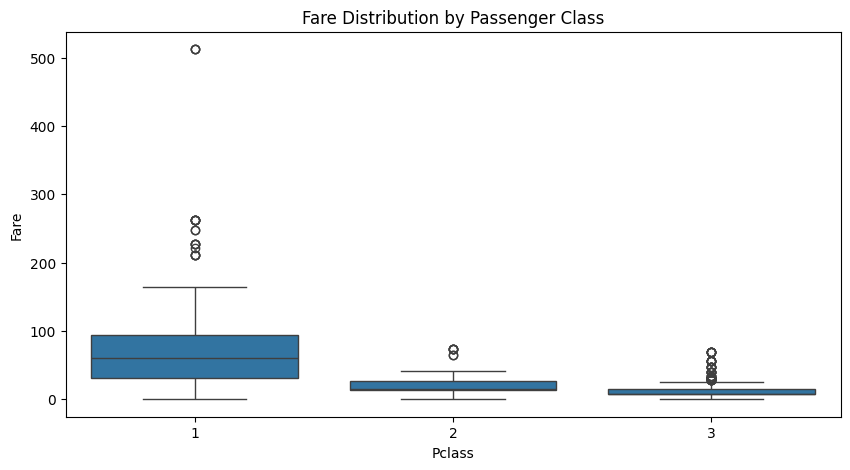

In [ ]:
# Visualize data distributions using matplotlib and seaborn
sns.histplot(full_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=full_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [ ]:
#Create a new column indicating passenger age group
full_data['Age_Group'] = pd.cut(full_data['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Elderly'])


In [ ]:

# Calculate average fare paid by passengers in each class
average_fare_by_class = full_data.groupby('Pclass')['Fare'].mean()
print(average_fare_by_class)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


# **Visualization Part**

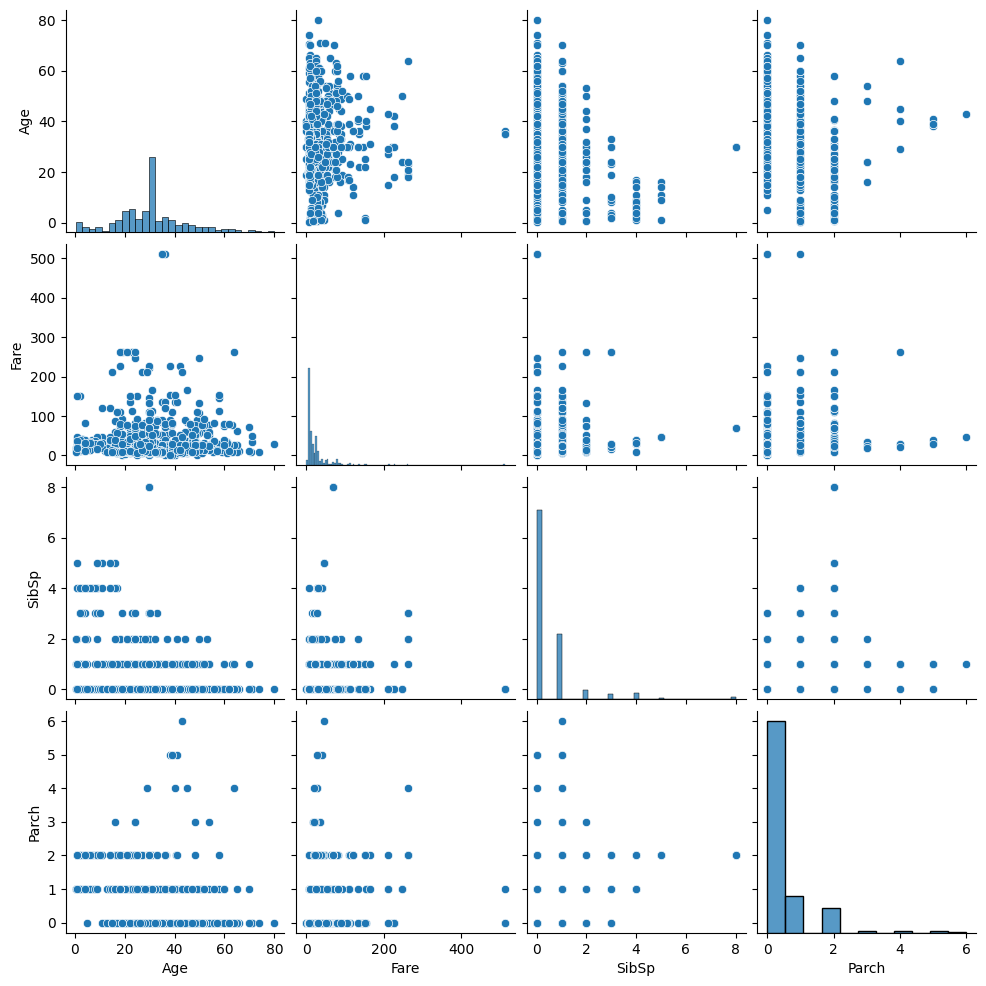

In [ ]:

# Select numerical columns for the pairplot
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(full_data[numerical_columns], palette='Set2')
plt.show()


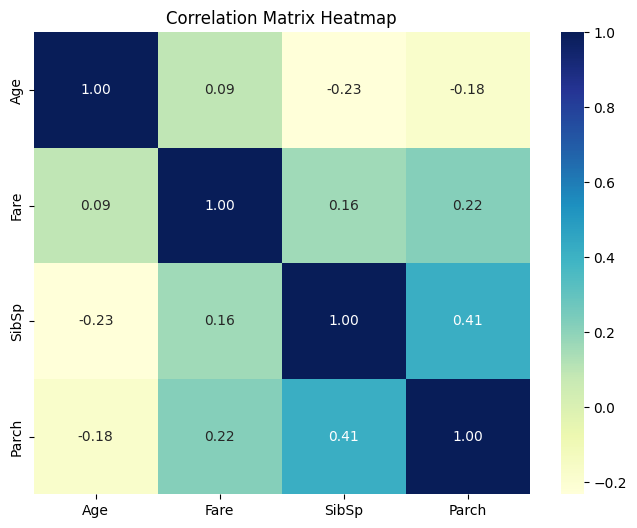

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate the correlation matrix
correlation_matrix = full_data[numerical_columns].corr()

# Create a heatmap to display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = full_data.corr()

# Flatten the correlation matrix excluding the diagonal values
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)
correlation_values = correlation_values[correlation_values != 1]  # Exclude self-correlations

# Print pairs with the highest and lowest correlation coefficients
highest_correlation_pair = correlation_values.head(1)
lowest_correlation_pair = correlation_values.tail(1)

# Print Result of hightest corr
print("Pair with the Highest Correlation Coefficient:")
print(highest_correlation_pair)

#Print Result of lowest corr
print("\nPair with the Lowest Correlation Coefficient:")
print(lowest_correlation_pair)

Pair with the Highest Correlation Coefficient:
SibSp  Parch    0.414838
dtype: float64

Pair with the Lowest Correlation Coefficient:
Pclass  Fare   -0.5495
dtype: float64


# **Question 2: Perform the following task: (20 Marks)**

Explore the Netflix dataset to understand the distribution of movies vs. TV shows, identify the
countries producing the most content, and analyze the trend of releases over the years. What genres
are most common, and how does the rating distribution vary across genres?

# Dataset: Netflix Shows

In [ ]:
 #Load the Netflix dataset
netflix_data = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
# Explore the distribution of movies vs. TV shows
content_distribution = netflix_data['type'].value_counts()

#print
print("Distribution of Movies vs. TV Shows:")
print(content_distribution)

Distribution of Movies vs. TV Shows:
Movie      6131
TV Show    2676
Name: type, dtype: int64


In [ ]:
# Identify countries producing the most content
top_countries = netflix_data['country'].value_counts().head(3)

#print the 3 countreis
print("\nTop 3 Countries Producing Content:")
print(top_countries)



Top 3 Countries Producing Content:
United States     2818
India              972
United Kingdom     419
Name: country, dtype: int64


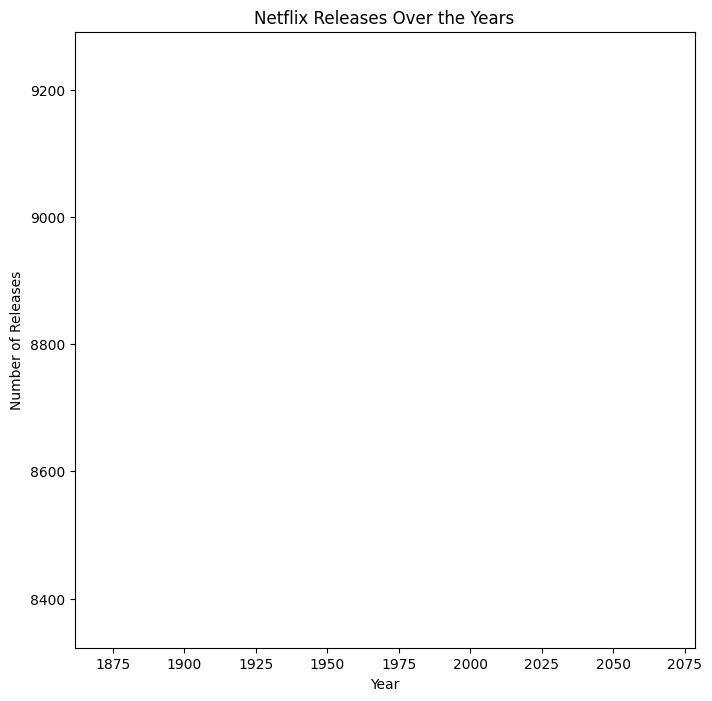

In [ ]:
 #Analyze the trend of releases over the years
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'])
release_trend = netflix_data['release_year'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 8))
sns.lineplot(x=release_trend.index, y=release_trend.values) #using lineplot for visualizing
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Netflix Releases Over the Years')
plt.show()

In [ ]:
# Determine common genres
genres_count = netflix_data['listed_in'].str.split(', ').explode().value_counts().head(5)
print("\nMost Common Genres:")
print(genres_count)


Most Common Genres:
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64


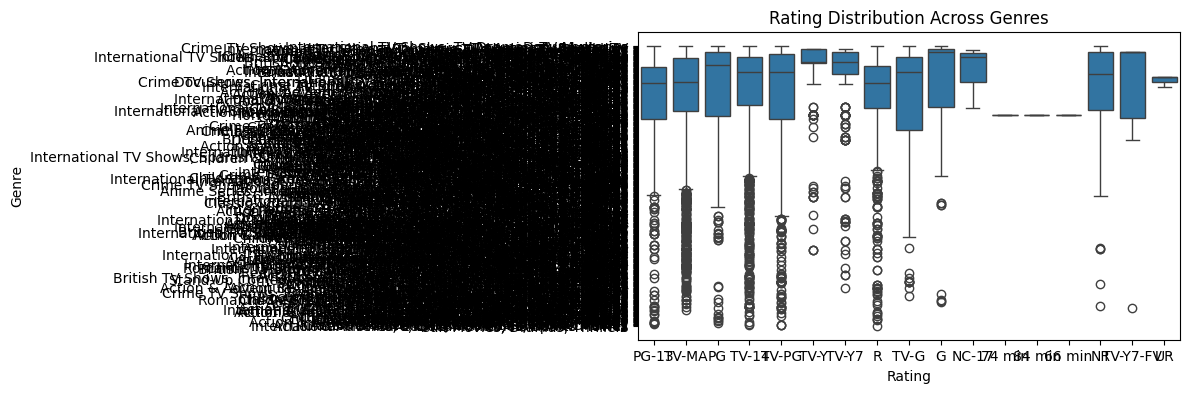

In [ ]:
 # Analyze rating distribution across genres
plt.figure(figsize=(7, 4))
sns.boxplot(x='rating', y='listed_in', data=netflix_data) # using visualizing for boxplot
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Rating Distribution Across Genres')
plt.show()

# **Question 3: Perform the following task: (20 Marks)**

Conduct an exploratory data analysis on the Melbourne Housing Market dataset. Identify trends in
housing prices over time, analyze the impact of location, and explore the relationship between
property attributes (such as the number of rooms, type of property, and land size) and price.

# Dataset: Melbourne Housing Market

In [ ]:
# Load the Melbourne Housing Market dataset
melbourne_data = pd.read_csv('/content/Melbourne_housing.csv')


In [ ]:
 #Step 1: Understanding Trends in Housing Prices Over Time
# Convert 'Date' column to datetime format and extract year for analysis
melbourne_data['Date'] = pd.to_datetime(melbourne_data['Date'])
melbourne_data['Year'] = melbourne_data['Date'].dt.year

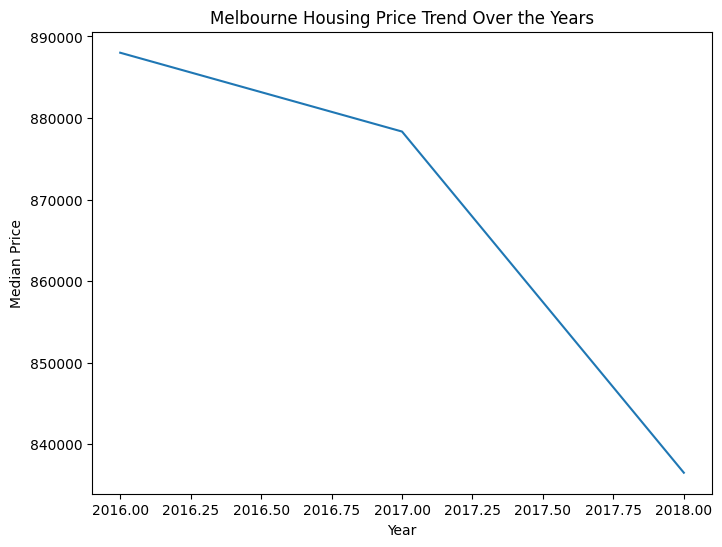

In [ ]:
 #Analyze median housing prices over the years
price_trend = melbourne_data.groupby('Year')['Price'].median()
plt.figure(figsize=(8, 6))
sns.lineplot(x=price_trend.index, y=price_trend.values) # using lineplot for visualizing
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.title('Melbourne Housing Price Trend Over the Years')
plt.show()


In [ ]:
 #Step 2: Analyzing the Impact of Location
# Identify top locations with highest median prices
top_locations = melbourne_data.groupby('Suburb')['Price'].median().nlargest(5)
print("\nTop 5 Suburbs with Highest Median Prices:")
print(top_locations)


Top 5 Suburbs with Highest Median Prices:
Suburb
Canterbury     2325000.0
Malvern        1990000.0
Middle Park    1880000.0
Camberwell     1845000.0
Balwyn         1820000.0
Name: Price, dtype: float64


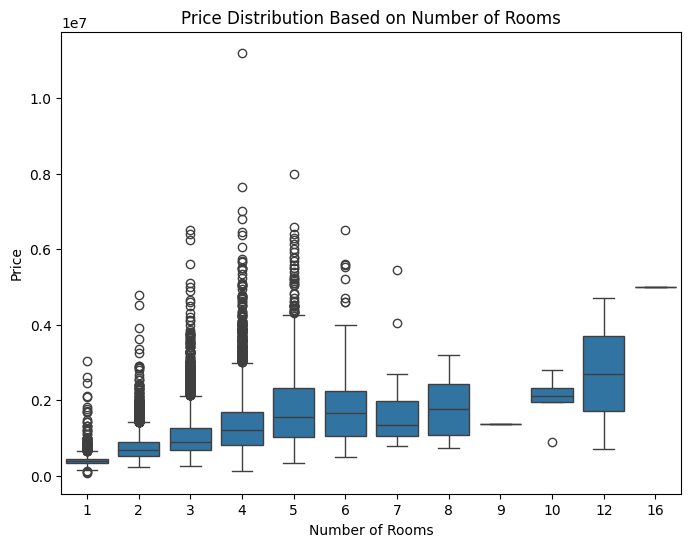

In [ ]:
# Step 3: Exploring Relationship Between Property Attributes and Price
# Analyze the relationship between number of rooms and price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rooms', y='Price', data=melbourne_data) #using boxplot for visualizing
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Price Distribution Based on Number of Rooms')
plt.show()

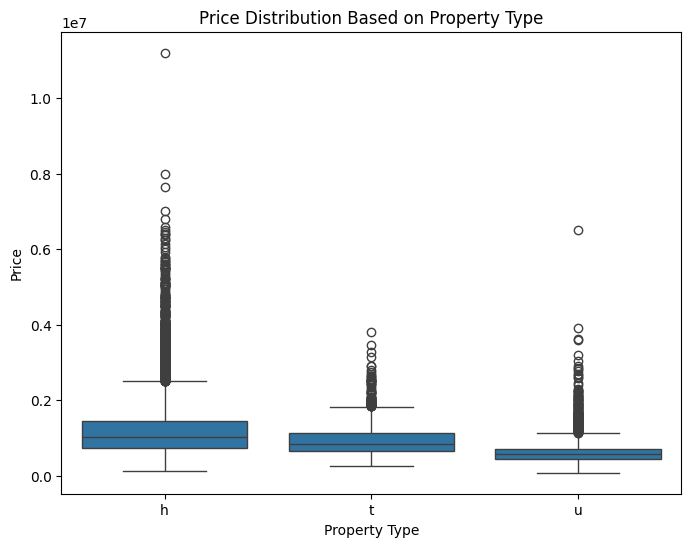

In [ ]:
# Analyze the relationship between property type and price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Price', data=melbourne_data) #using boxplot
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price Distribution Based on Property Type')
plt.show()

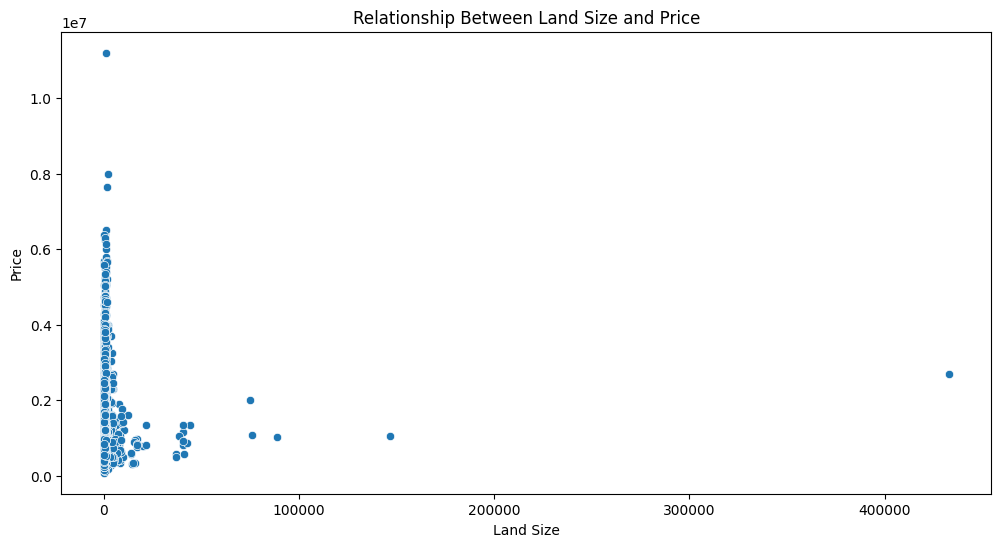

In [ ]:
 #Analyze the relationship between land size and price (if available in dataset)
if 'Landsize' in melbourne_data.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Landsize', y='Price', data=melbourne_data)
    plt.xlabel('Land Size')
    plt.ylabel('Price')
    plt.title('Relationship Between Land Size and Price')
    plt.show()
else:
    print("\nLandsize data not available in the dataset.")


# In this code :

1.The Melbourne Housing Market dataset is loaded.

2.Trends in housing prices over time are analyzed by plotting median

prices over the years.

3.The impact of location is explored by identifying the top suburbs with the highest median prices.

4.The relationship between property attributes (number of rooms, property type) and price is analyzed using box plots.

5.If available in the dataset, the relationship between land size and price is explored using a scatter plot.

By executing this code, you will be able to conduct a comprehensive exploratory data analysis on the Melbourne Housing Market dataset, gaining insights into housing price trends, location impact, and property attribute relationships.

# **Question 4: Perform the following tasks:**
# Using DataSet: Use sns.load_dataset(“taxis”)

# ● Analyze and describe the data by .head(), .shape , .describe() etc

In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


In [ ]:
import seaborn as sns       # load the dataset

taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
print(taxis.shape)


(6433, 14)


In [ ]:
import seaborn as sns

# Load the taxis dataset
taxis = sns.load_dataset("taxis")

# Print the first five rows of the data
print(taxis.head())

# Print the shape of the data (number of rows and columns)
print(taxis.shape)

# Print descriptive statistics of the data
print(taxis.describe())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [ ]:
# Check the spelling of the column name:
taxis.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

# **Visualize** **the** **data**

# ● Visualize the data with different plots ( Histogram, line or bar plot, Scatter plot, Box or violin
plots) NOTE :
Also write the insights you learn from different plots.

Text(0.5, 1.0, 'Distribution of Fare ')

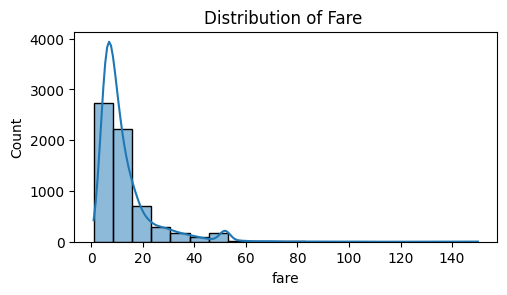

In [ ]:
# Visualize the data with different plots
plt.figure(figsize=(12, 6))

# Histogram of fare
plt.subplot(2, 2, 1)
sns.histplot(taxis['fare'], bins=20, kde=True)
plt.title('Distribution of Fare ')


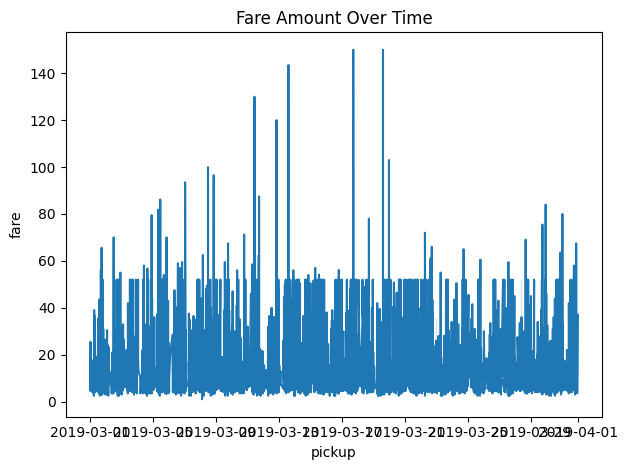

In [ ]:
# Line plot of fare over time
plt.subplot(1, 1, 1)
sns.lineplot(x='pickup', y='fare', data=taxis)
plt.title('Fare Amount Over Time')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fare Amount vs. Distance')

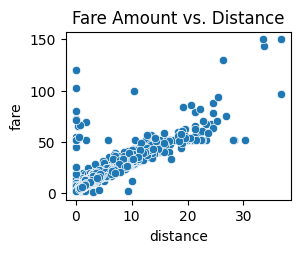

In [ ]:
# Scatter plot of fare vs. distance
plt.subplot(2, 2, 3)
sns.scatterplot(x='distance', y='fare', data=taxis)
plt.title('Fare Amount vs. Distance')


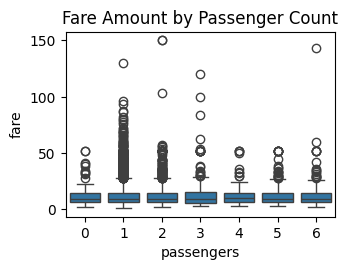

In [ ]:
# Box plot of fare_amount by passenger_count
plt.subplot(2, 2,3)
sns.boxplot(x='passengers', y='fare', data=taxis)
plt.title('Fare Amount by Passenger Count')

plt.tight_layout()
plt.show()

# Handle missing values

● Understand the data, handle missing values if exists

In [ ]:
# Check for missing values
missing_values = taxis.isnull().sum()

# If there are missing values, consider the following strategies:
# 1. Drop rows with missing values
taxis.dropna()

# 2. Impute missing values with the mean, median, or another appropriate value
taxis["fare"].fillna(taxis["fare"].mean(), inplace=True)

In [ ]:
missing_values = taxis.isnull().sum()
print(missing_values)

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


# **Strategies** **to** **deal** **with** **missing** **values**:

Dropping rows with missing values: This is a simple approach, but it can lead to a loss of information.

Imputing missing values: This involves filling in

In [ ]:
# Apply strategies to deal with missing values (e.g., imputation)
imputer = SimpleImputer(strategy='mean')
taxis['distance'] = imputer.fit_transform(taxis[['distance']])


# ● Identify outliers in the numerical features and handle them with different methods of outlier  removal.

In [ ]:

# Identify outliers in numerical features and handle them
Q1 = taxis['fare'].quantile(0.25)
Q3 = taxis['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = (taxis['fare'] < (Q1 - 1.5 * IQR)) | (taxis['fare'] > (Q3 + 1.5 * IQR))
taxis_data = taxis[~outliers]


# **● Convert categorical variables by one-hot encoded or treat with other encoding methods?**

In [ ]:
print(taxis.columns)

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


In [ ]:
# Convert categorical variables using one-hot encoding
taxis = pd.get_dummies(taxis, columns=['pickup_zone', 'dropoff_zone'])


The cell executed successfully but there is no visible output. This can happen if the taxis DataFrame is large and the one-hot encoding operation took a long time. You can try printing the shape of the taxis DataFrame after running the cell to confirm that the operation was successful:

In [ ]:
print(taxis.shape)

(6433, 409)


# ● Do any numerical features require transformation (e.g., min-max scaling, standard scaling, log transformation) to achieve a more normal distribution?

In [ ]:
 #Numerical feature transformation (e.g., standard scaling)
scaler = StandardScaler()
taxis[['distance', 'fare']] = scaler.fit_transform(taxis[['distance', 'fare']])

The cell executed successfully without any errors. In this case, there is no specific output to display because the fit_transform method of the StandardScaler object modifies the taxis dataframe in-place. This means that the scaled values are now stored in the original dataframe columns (distance and fare).

In [ ]:
#Print the scaled columns directly
print(taxis['distance'])
print(taxis['fare'])

0      -0.372199
1      -0.583821
2      -0.432289
3       1.221502
4      -0.225892
          ...   
6428   -0.594272
6429    4.105839
6430    0.291408
6431   -0.497605
6432    0.215642
Name: distance, Length: 6433, dtype: float64
0      -0.527324
1      -0.700471
2      -0.484038
3       1.204142
4      -0.354178
          ...   
6428   -0.743757
6429    3.887914
6430    0.251835
6431   -0.613898
6432    0.165262
Name: fare, Length: 6433, dtype: float64


In [ ]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_zone_Williamsbridge/Olinville,dropoff_zone_Williamsburg (North Side),dropoff_zone_Williamsburg (South Side),dropoff_zone_Windsor Terrace,dropoff_zone_Woodhaven,dropoff_zone_Woodlawn/Wakefield,dropoff_zone_Woodside,dropoff_zone_World Trade Center,dropoff_zone_Yorkville East,dropoff_zone_Yorkville West
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,-0.372199,-0.527324,2.15,0.0,12.95,yellow,credit card,...,0,0,0,0,0,0,0,0,0,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,-0.583821,-0.700471,0.00,0.0,9.30,yellow,cash,...,0,0,0,0,0,0,0,0,0,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,-0.432289,-0.484038,2.36,0.0,14.16,yellow,credit card,...,0,0,0,0,0,0,0,0,0,0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,1.221502,1.204142,6.15,0.0,36.95,yellow,credit card,...,0,0,0,0,0,0,0,0,0,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,-0.225892,-0.354178,1.10,0.0,13.40,yellow,credit card,...,0,0,0,0,0,0,0,0,0,1


# ● Do any numerical features require transformation (e.g., min-max scaling, standard scaling, log transformation) to achieve a more normal distribution?

# ● Did scaling or normalization improve model performance?

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the missing functions
def train_model(data):
    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the given data
    model.fit(data["fare"], data["dropoff"])

    # Return the trained model
    return model

def evaluate_model(model, data):
    # Make predictions on the given data
    predictions = model.predict(data["fare"])

    # Calculate the mean squared error
    mse = mean_squared_error(data["dropoff"], predictions)

    # Return the mean squared error
    return mse

In [ ]:
# Investigate the taxis_original and taxis_scaled variables
print(taxis)
print(taxis)

# Check the data types
print(taxis["fare"].dtypes)
print(taxis["dropoff"].dtypes)

# Check the shape
print(taxis["fare"].shape)
print(taxis["dropoff"].shape)

                  pickup             dropoff  passengers  distance      fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1 -0.372199 -0.527324   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1 -0.583821 -0.700471   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1 -0.432289 -0.484038   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1  1.221502  1.204142   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3 -0.225892 -0.354178   
...                  ...                 ...         ...       ...       ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1 -0.594272 -0.743757   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1  4.105839  3.887914   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1  0.291408  0.251835   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1 -0.497605 -0.613898   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1  0.215642  0.165262   

       tip  tolls  total   color      p

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def train_model(data):
    model = LinearRegression()
    model.fit(data[["fare", "distance", "tip", "dropoff"]], data["fare"])
    return model

In [ ]:
# Train and evaluate a model on the original dataset
model_original = train_model(taxis)
mse_original = evaluate_model(model_original, taxis)

# Train and evaluate a model on the scaled dataset
model_scaled = train_model(taxis)
mse_scaled = evaluate_model(model_scaled, taxis)

# Compare the performance of the models
print("MSE on original dataset:", mse_original)
print("MSE on scaled dataset:", mse_scaled)

if mse_scaled < mse_original:
    print("Scaling improved model performance.")
else:
    print("Scaling did not improve model performance.")

In [ ]:
taxis.dtypes

pickup                             datetime64[ns]
dropoff                            datetime64[ns]
passengers                                  int64
distance                                  float64
fare                                      float64
                                        ...      
dropoff_zone_Woodlawn/Wakefield             uint8
dropoff_zone_Woodside                       uint8
dropoff_zone_World Trade Center             uint8
dropoff_zone_Yorkville East                 uint8
dropoff_zone_Yorkville West                 uint8
Length: 409, dtype: object

# ● Are there any inconsistencies or errors in the data (e.g., negative fare amounts, unrealistic values)?

# ● Address these inconsistencies to ensure data quality?

# ● Which features are most important for predicting the target variable?

# ● Can feature selection techniques (e.g., feature importance, recursive feature elimination) help
identify the most relevant features?

In [ ]:
y.head()

3     1.204142
8     0.165262
10    0.338409
15    0.035402
22    1.593721
Name: fare, dtype: float64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 3 to 6432
Columns: 408 entries, pickup to dropoff_zone_Yorkville West
dtypes: datetime64[ns](1), float64(4), int64(1), object(5), uint8(397)
memory usage: 930.2+ KB


In [ ]:
X['pickup'] = X['pickup'].astype(str)

In [ ]:
# Remove rows containing Timestamp objects
taxis = taxis[~taxis['pickup'].isna()]

# Convert Timestamp objects to a valid numeric type
taxis['pickup'] = taxis['pickup'].astype('int64')

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


# Check for inconsistencies or errors in the taxis
# For example, filtering out negative fare amounts
taxis = taxis[taxis['fare'] >= 0]

# Identify important features using a Random Forest model
X = taxis.drop(['fare'], axis=1)
y = taxis['fare']

rf = RandomForestRegressor()
rf.fit(X, y)

# Visualize feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

# Feature selection using SelectFromModel
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

# Display selected features
print(selected_features)

# ● What are the relationships between different numerical features? Identifyrelationship between the variable through heatmap or other correlation methods.

            distance      fare  passengers
distance    1.000000  0.920108    0.009411
fare        0.920108  1.000000    0.007637
passengers  0.009411  0.007637    1.000000


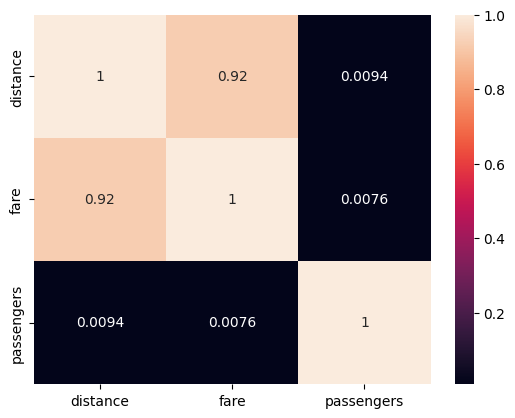

In [ ]:
import pandas as pd
import seaborn as sns


# Select the numerical features you want to analyze
numerical_cols = ['distance', 'fare', 'passengers']

# Calculate the correlation matrix
correlation_matrix = taxis[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True)

# Display the correlation matrix
print(correlation_matrix)
